# **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**


### **Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Import csv files**

In [5]:
df=pd.read_csv("BlinkIT Grocery Data.csv")

### **Sample data**

In [6]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Data Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **Data Size**

In [10]:
print("Size of Data :",df.shape)

Size of Data : (8523, 12)


### **Data Cleaning**

In [11]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

### **Rename item fat content**

In [13]:
df["Item Fat Content"]=df["Item Fat Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"}) 

In [15]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

## **Business Requirements**

### **KPI Calculations**

In [24]:
#total sales
total_sales = df['Sales'].sum()

#average sales
avg_sales = df['Sales'].mean()

#No. of items 
no_of_items=df['Sales'].count()

#Average Rating
avg_rating=df['Rating'].mean()

print(f"Total Sales      : ${total_sales:,.0f}")
print(f"Avg Sales        : ${avg_sales:,.0f}")
print(f"No. of items     : {no_of_items:,.0f}")
print(f"Average Rating   : {avg_rating:,.1f}")





Total Sales      : $1,201,681
Avg Sales        : $141
No. of items     : 8,523
Average Rating   : 4.0


## **Chart Requirements**

#### **Total Sales By Fat Content**

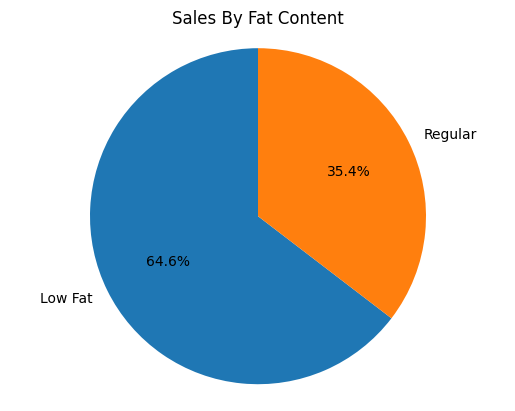

In [25]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,
        autopct= '%.1f%%',
        startangle =90)

plt.title('Sales By Fat Content')
plt.axis('equal')
plt.show()

#### **Total Sales By Item Type**

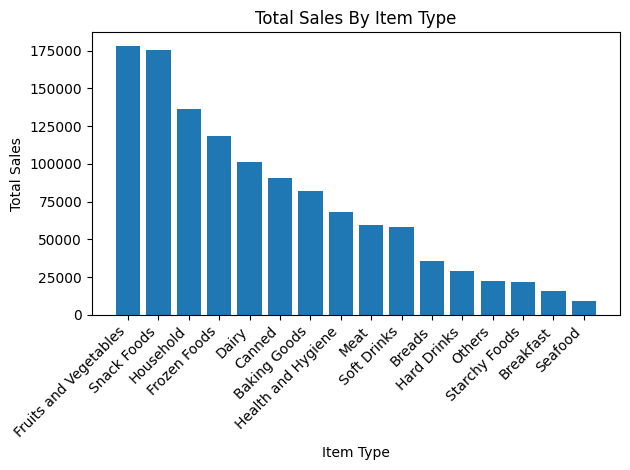

In [28]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
bars=plt.bar(sales_by_type.index,sales_by_type.values)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales By Item Type')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

#### **Fat Content By Outlet For Total Sales**

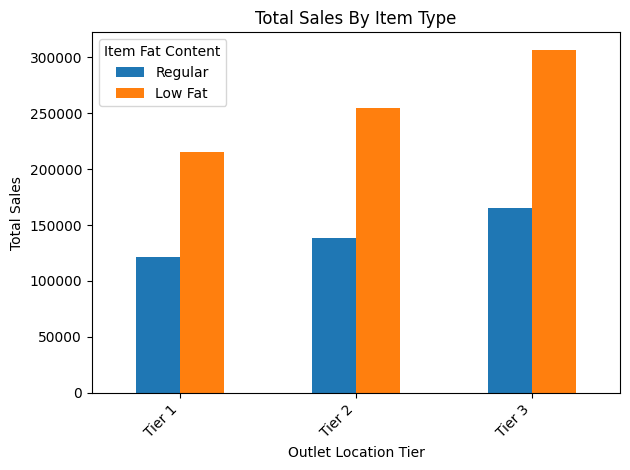

In [31]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
ax = grouped.plot(kind='bar')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.title('Total Sales By Item Type')
plt.legend(title='Item Fat Content')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()